
# Assignment 1

## 1 Feedforward: Building a ReLu 2 Layer neural network

### 1.
### 2. 

![title](hw1.jpg)

### 3.
### 4. 

In [124]:
import numpy as np

#######################
#   Helper functions  #
#######################

# ReLu function
def ReLu(z):
    return max(0, z)

# Softmax unit
def softmax(x):
    base = np.exp(x[0]) + np.exp(x[1]) + np.exp(x[2])
    y1 = np.exp(x[0])/base
    y2 = np.exp(x[1])/base
    y3 = np.exp(x[2])/base
    
    return np.array([y1,y2,y3]).T


def ff_nn_2_ReLu(x, w_1, w_2, v, b_1, b_2, c):
    '''
    A simple 2 layer neural network with sigmoid activation and binary output.
    '''
    # Setting up our output y
    num_rows,num_columns = x.shape
    y = np.zeros((num_rows, 3))
    H1 = np.zeros((num_rows, 3))
    H2 = np.zeros((num_rows, 2))
    
    for i in range(num_rows):
        x_i = x[i,:]
        #print('i = ', i)
        
        # Linear activations into hidden units
        a1 = x_i[0]*w_1[0,0] + x_i[1]*w_1[1,0] + b_1[0]
        a2 = x_i[0]*w_1[0,1] + x_i[1]*w_1[1,1] + b_1[1]
        a3 = x_i[0]*w_1[0,2] + x_i[1]*w_1[1,2] + b_1[2]
        
        #print('hidden layer 1', a1, a2, a3)
        
        # output of hidden units 1
        h_1 = ReLu(a1)
        h_2 = ReLu(a2)
        h_3 = ReLu(a3)
        h1 = np.array([h_1,h_2,h_3])
        
        # Linear activations into hidden units
        a1 = h1[0]*w_2[0,0] + h1[1]*w_2[1,0] + h1[2]*w_2[2,0] + b_2[0]
        a2 = h1[0]*w_2[0,1] + h1[1]*w_2[1,1] + h1[2]*w_2[2,1] + b_2[1]
        
        #print('hidden layer 2', a1, a2)
        
        # output of hidden units 2
        h_1 = ReLu(a1)
        h_2 = ReLu(a2)
        h2 = np.array([h_1,h_2])
        
        # Linear activations into output units
        a1 = h2[0]*v[0,0] + h2[1]*v[1,0] + c[0]
        a2 = h2[0]*v[0,1] + h2[1]*v[1,1] + c[1]
        a3 = h2[0]*v[0,2] + h2[1]*v[1,2] + c[2]
        
        #print('output layer', a1, a2, a3)
        
        # Output of network
        H1[i,:] = h1
        H2[i,:] = h2
        y[i,:] = softmax([a1,a2,a3])
  
    return np.array(y), H1, H2

X = np.array([[1, -1],[0, -1],[0, 1]])
W1 = np.array([[1, -1, 0],[0, 0, 0.5]])
W2 = np.array([[1, -1],[0, -1],[0, 0]])
V = np.array([[1, 0, -1],[1, 0, -1]])
B1 = [0,0,1]
B2 = [1,-1]
C = [1,0,0]

Y, H1, H2 = ff_nn_2_ReLu(X, W1, W2, V, B1, B2, C)
Y


array([[ 0.94649912,  0.04712342,  0.00637746],
       [ 0.84379473,  0.1141952 ,  0.04201007],
       [ 0.84379473,  0.1141952 ,  0.04201007]])

When x = (1, -1), the class probabilities are (0.94649912, 0.04712342, 0.00637746).  
When x = (0, -1), the class probabilities are (0.84379473, 0.1141952, 0.04201007).  
When x = (0, 1), the class probabilities are (0.84379473, 0.1141952, 0.04201007).  

## 2 Gradient Descent


### 1.

![title](hw1-2.jpg)

### 2. 

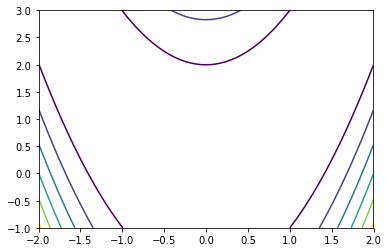

In [42]:
# --- Load Librarires ---
import numpy as np
import matplotlib.pyplot as plt
import random

# --- Paraboloid Function ---
delta = 0.0025
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-1.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2+100*(Y-X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)


### 3.

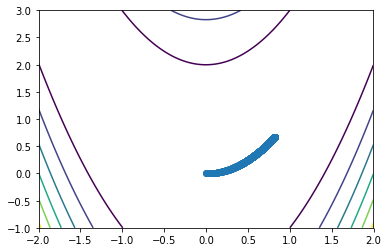

In [59]:
# --- Defining gradient ----
def grad_f(vector):
    x, y = vector
    df_dx = 2*(x-1) - 400*x*(y-x**2)
    df_dy = 200*(y-x**2)
    return np.array([df_dx, df_dy])

# --- Grad Descent ----
def grad_descent(starting_point=None, iterations=100, learning_rate=0.0025):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-3,1,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)


# --- Visualize Trajectory, learning_rate=0.002 ---
np.random.seed(10)
traj = grad_descent(starting_point=(0,0),iterations=1000, learning_rate=0.002)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


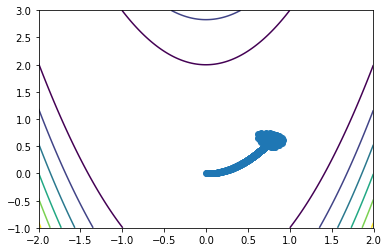

In [60]:
# --- Visualize Trajectory, learning_rate=0.003 ---
np.random.seed(10)
traj = grad_descent(starting_point=(0,0),iterations=1000, learning_rate=0.003)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

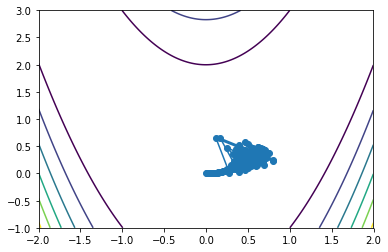

In [61]:
# --- Visualize Trajectory, learning_rate=0.005 ---
np.random.seed(10)
traj = grad_descent(starting_point=(0,0),iterations=1000, learning_rate=0.005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


### 4.

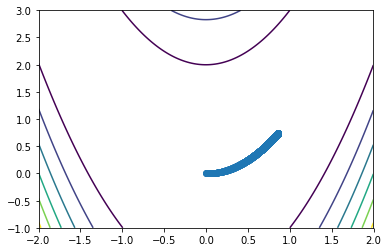

In [68]:
# --- Gradient with momentum ---
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.array([0,0])
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

# --- Visualizing trajectory, epsilon=0.002, alpha=0.2 --
np.random.seed(10)

traj = grad_descent_with_momentum(iterations=1000, epsilon=0.002, alpha=0.2)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

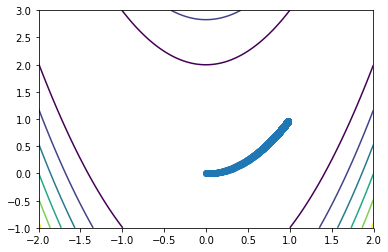

In [78]:
# --- Visualizing trajectory, epsilon=0.002, alpha=0.7 --
np.random.seed(10)

traj = grad_descent_with_momentum(iterations=1000, epsilon=0.002, alpha=0.7)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

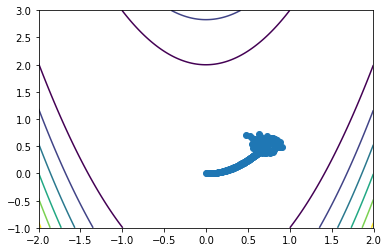

In [79]:
# --- Visualizing trajectory, epsilon=0.004, alpha=0.2 --
np.random.seed(10)

traj = grad_descent_with_momentum(iterations=1000, epsilon=0.004, alpha=0.2)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

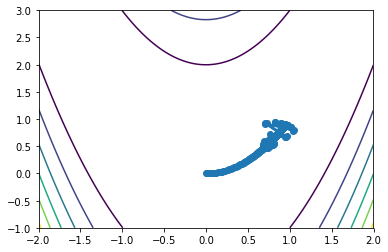

In [80]:
# --- Visualizing trajectory, epsilon=0.004, alpha=0.7 --
np.random.seed(10)

traj = grad_descent_with_momentum(iterations=1000, epsilon=0.004, alpha=0.7)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## 3 Backprop




### 1.
![title](hw1-333.jpg)


### 2. 

In [334]:
def grad_f(x, w_1, w_2, v, b_1, b_2, c, y):
    n = x.shape[0]
    yhat, h1, h2 = ff_nn_2_ReLu(x, w_1, w_2, v, b_1, b_2, c)
    dc = np.average(yhat - y, axis = 0)
    dv = np.matmul(h2.T, yhat - y)/n

    #print(np.matmul(y-yhat, v.T).shape, (h2>0).shape)
    dw2 = np.matmul(h1.T, np.matmul(yhat - y, v.T)*(h2>0))
    db2 = np.average(np.matmul(yhat - y, v.T)*(h2>0), axis = 0)

    # need to be revised
    #print(np.matmul(np.matmul(y-yhat, v.T)*(h2>0),w_2.T), np.matmul(np.matmul(y-yhat, v.T)*(h2>0),w_2.T).shape)
    
    dw1 = x.T.dot((((yhat - y).dot(v.T)* (h2 > 0)).dot(w_2.T)* (h1 > 0)))
    #dw1 = np.matmul(x.T, np.matmul(np.matmul(y-yhat, v.T)*(h2>0),w_2.T)).dot(h1>0)
    db1 = np.average(((yhat - y).dot(v.T)* (h2 > 0)).dot(w_2.T)* (h1 > 0), axis = 0)
    #db1 = np.average(np.matmul(np.matmul(y-yhat, v.T)*(h2>0),w_2.T).dot(h1>0), axis = 0) 

    return dw1, dw2, dv, db1, db2, dc

In [335]:
X = np.array([[1, -1],[0, -1], [-1, -1], [0,0]])
W1 = np.array([[1, -1, 0],[0, 0, 0.5]])
W2 = np.array([[1, -1],[0, -1],[0, 0]])
V = np.array([[1, 0, -1],[1, 0, -1]])
B1 = [0,0,1]
B2 = [1,-1]
C = [1,0,0]

dw1, dw2, dv, db1, db2, dc = grad_f(X,W1,W2,V,B1,B2,C,np.array([[1,0,0],[0,1,0],[0,0,1],[1,0,0]]))



In [336]:
print('dc = ', dc)
print('dv = ', dv)
print('dw2 = ', dw2)
print('db2 = ', db2)
print('dw1 = ', dw1)
print('db1 = ', db1)

dc =  [ 0.36947083 -0.15257275 -0.21689809]
dv =  [[ 0.35609561 -0.14079189 -0.21530372]
 [ 0.          0.          0.        ]]
dw2 =  [[-0.05987834  0.        ]
 [ 1.80178467  0.        ]
 [ 1.07363017  0.        ]]
db2 =  [ 0.58636892  0.        ]
dw1 =  [[-0.05987834  0.          0.        ]
 [ 0.05987834  0.          0.        ]]
db1 =  [-0.01496958  0.          0.        ]



### 3. 

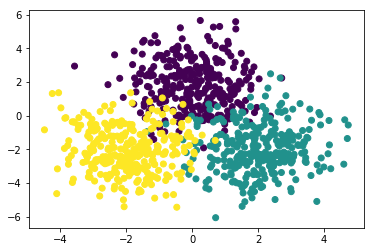

In [398]:
x = np.concatenate(
    (np.random.multivariate_normal(mean=[0,2],cov=[[1,0],[0,2]],size = 300),
    np.random.multivariate_normal(mean=[2,-2],cov=[[1,0],[0,2]],size = 300),
    np.random.multivariate_normal(mean=[-2,-2],cov=[[1,0],[0,2]],size = 300)))
y = np.zeros(900)
y[:300] = 0
y[300:600] = 1
y[600:] = 2
plt.scatter(x[:,0], x[:,1], c=y)

W1 = np.random.uniform(-.1,.1,size=6).reshape(2,3)
W2 = np.random.uniform(-.1,.1,size=6).reshape(3,2)
V = np.random.uniform(-.1,.1,size=6).reshape(2,3)
B1 = np.array([0,0,0])
B2 = np.array([0,0])
C = np.array([0,0,0])


### 4. 

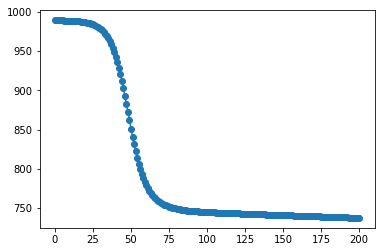

In [401]:
def loss(y, yhat):
    n = y.shape[0]
    result = 0
    for i in range(n):
        result += (-y[i]*np.log(yhat[i])).sum()
    return result


def grad_descent(x, y, w_1, b_1, w_2, b_2, v, c, iterations=50, learning_rate=1e-1):
    #dc,dv,dw2,db2,dw1,db1 = grad_f(w_1, b_1, w_2, b_2, v, c, x, y)
    point = np.array([w_1, w_2, v, b_1, b_2, c])
    losses = [loss(y, ff_nn_2_ReLu(x, w_1, w_2, v, b_1, b_2, c)[0])]
    
    for i in range(iterations):
        w_1, w_2, v, b_1, b_2, c = point
        dw1, dw2, dv, db1, db2, dc = grad_f(x, w_1, w_2, v, b_1, b_2, c, y)
        #point = np.array([w_1, w_2, v, b_1, b_2, c])
        point = point - learning_rate * np.array([dw1, dw2, dv, db1, db2, dc])
        w_1, w_2, v, b_1, b_2, c = point
        #print(point)
        losses.append(loss(y, ff_nn_2_ReLu(x, w_1, w_2, v, b_1, b_2, c)[0]))
    return losses

Y = np.zeros([900, 3])
for i in range(300):
    Y[i,:] = np.array([1,0,0])
    Y[i+300,:] = np.array([0,1,0])
    Y[i+600,:] = np.array([0,0,1])

losses = grad_descent(x, Y, W1, B1, W2, B2, V, C, iterations=200, learning_rate=0.001)
plt.plot(losses,'-o')
#plt.xlim(0,100)

In [403]:
losses[:10]

[989.11395396263117,
 989.11395396263117,
 988.50406440129825,
 987.64761499740519,
 984.91208026480967,
 975.58571386653546,
 945.51425737630052,
 867.74233742474064,
 776.57367465921072,
 751.46380414406985]


### 5. 

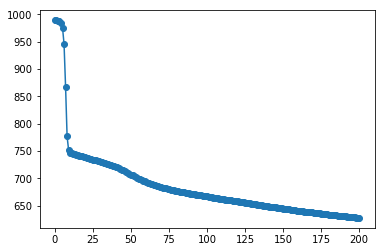

In [402]:

def grad_descent_with_momentum(x, y, w_1, b_1, w_2, b_2, v, c, iterations=50, alpha=0.9, epsilon=10):
    #dc,dv,dw2,db2,dw1,db1 = grad_f(w_1, b_1, w_2, b_2, v, c, x, y)
    point = np.array([w_1, w_2, v, b_1, b_2, c])
    losses = [loss(y, ff_nn_2_ReLu(x, w_1, w_2, v, b_1, b_2, c)[0])]
    V = np.array([np.zeros(w_1.shape), np.zeros(w_2.shape), np.zeros(v.shape), np.zeros(b_1.shape), np.zeros(b_2.shape), np.zeros(c.size)])
    #print(v.shape, np.zeros(v.shape))
    for i in range(iterations):
        w_1, w_2, v, b_1, b_2, c = point
        dw1, dw2, dv, db1, db2, dc = grad_f(x, w_1, w_2, v, b_1, b_2, c, y)
        #print(dv.shape)
        #print(alpha*np.zeros(v.shape)+epsilon*dv)
        V = alpha*V + epsilon * np.array([dw1, dw2, dv, db1, db2, dc])
        #point = np.array([w_1, w_2, v, b_1, b_2, c])
        point = point - V
        #print(point)
        losses.append(loss(y, ff_nn_2_ReLu(x, w_1, w_2, v, b_1, b_2, c)[0]))
    return losses


''' 
W1 = np.random.randn(6).reshape(2,3)
W2 = np.random.randn(6).reshape(3,2)
V = np.random.randn(6).reshape(2,3)
B1 = np.array([0,0,0])
B2 = np.array([0,0])
C = np.array([0,0,0])
''' 

losses = grad_descent_with_momentum(x, Y, W1, B1, W2, B2, V, C, iterations=200, alpha=0.1, epsilon=0.01)
plt.plot(losses,'-o')
#plt.xlim(0,100)

In [404]:
losses[:10]

[989.11395396263117,
 989.11395396263117,
 988.50406440129825,
 987.64761499740519,
 984.91208026480967,
 975.58571386653546,
 945.51425737630052,
 867.74233742474064,
 776.57367465921072,
 751.46380414406985]

**Comment:** My algorithm converges more efficiently with momentum.